In [ ]:
---
title: Optimization for Logistic Regression
author: Alice (Yanruo) Zhang
date: '2023-03-06'
image: "challah.JPG"
description: "Regular and stochastic logistic regression fit models with experiements on learning rate, batch size, momentum, and feature numbers."
format: html
---

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random

from gradient import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

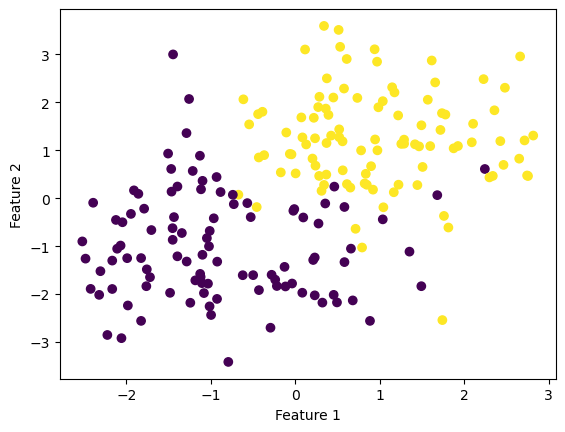

In [24]:
np.random.seed(300)
# make the data
X, y = make_blobs(n_samples = 200, n_features = 2, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [11]:
# fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.01, max_epochs = 1000)

# inspect the fitted value of w
LR.w 

# check history
print(f"{LR.score_history[-10:] = }")
print(f"{LR.loss_history[-10:] = }")

LR.score_history[-10:] = [0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945]
LR.loss_history[-10:] = [0.21195696250763846, 0.21190646535032115, 0.2118560735821291, 0.2118057868924457, 0.21175560497185045, 0.21170552751211297, 0.2116555542061873, 0.21160568474820646, 0.21155591883347674, 0.21150625615847218]


LR.loss_history[-10:] = [0.1749583312858246, 0.1749519561793999, 0.1749437099635265, 0.17493553065714354, 0.17492769890213414, 0.17492149041408503, 0.17491763977785968, 0.17491133797270816, 0.1749047354349967, 0.17489868126848518]
LR.loss_history[-10:] = [0.1749198792959875, 0.17491325642416886, 0.17490916154008823, 0.17490385425048274, 0.17489673431520103, 0.17489073792094043, 0.17488394501308274, 0.17487824708887026, 0.1748739817742154, 0.17486973253491353]
100
LR.loss_history[-10:] = [0.25505411669552247, 0.2541391227604576, 0.2532409198374154, 0.25235906739303954, 0.2514931400488848, 0.2506427269360351, 0.2498074310824243, 0.24898686883094479, 0.24818066928655402, 0.24738847379070777]
num_steps = 100


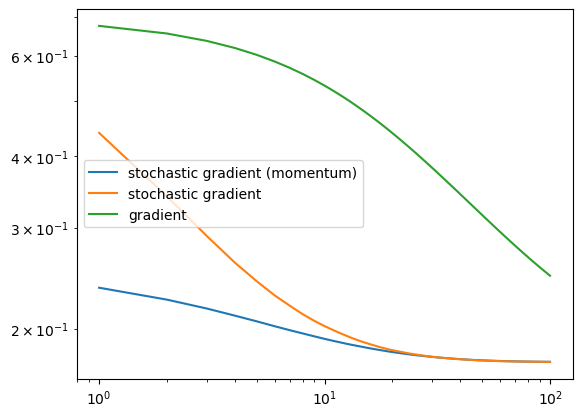

In [8]:
np.random.seed(666)
# stochasitc gradient (with momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 10, 
                  alpha = .05) 

# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05)
# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
print(num_steps)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# gradient
LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 100)

# check history
print(f"{LR.loss_history[-10:] = }")

# plot
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
print(f"{num_steps = }")

# plot loglog
plt.loglog()

legend = plt.legend()

# Experiments

After you have tested and implemented your class, please perform experiments in which you show examples of the following phenomena:

A case in which gradient descent does not converge to a minimizer because the learning rate 
 is too large.

A case in which the choice of batch size influences how quickly the algorithm converges.
If you implemented momentum, a case in which the use of momentum significantly speeds up convergence.
In at least one of these experiments, generate some synthetic data (it’s fine to use make_blobs) for data of at least 10 feature dimensions.

1. A case in which gradient descent does not converge to a minimizer because the learning rate is too large.

num_steps = 100


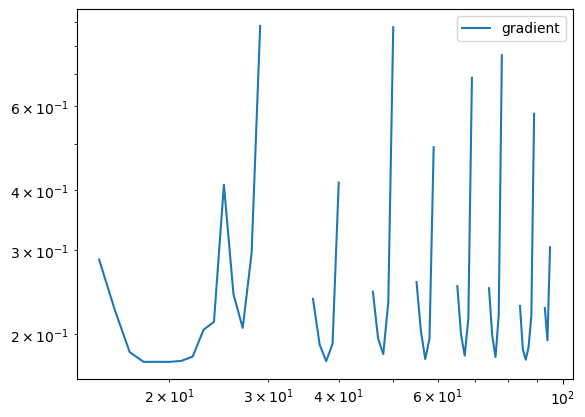

In [10]:
np.random.seed(306)
#gradient
LR = LogisticRegression()
LR.fit(X, y, alpha = 100, max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
print(f"{num_steps = }")

# plot loglog
plt.loglog()

legend = plt.legend()

2. A case in which the choice of batch size influences how quickly the algorithm converges.

64
100


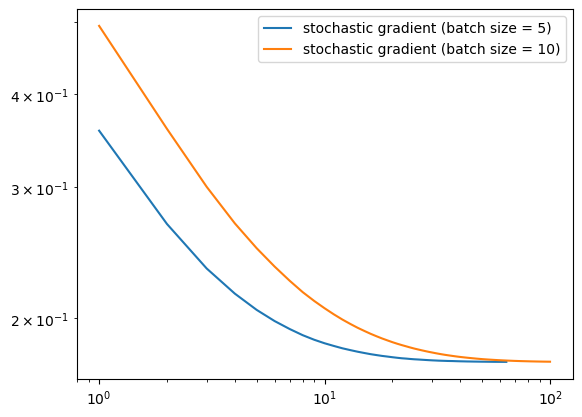

In [11]:
np.random.seed(307)
# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 5, 
                  alpha = .05)

num_steps = len(LR.loss_history)
print(num_steps)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 5)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 10, 
                  alpha = .05)

num_steps = len(LR.loss_history)
print(num_steps)
#print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch size = 10)")

# plot loglog
plt.loglog()

legend = plt.legend()

3. A case in which the use of momentum significantly speeds up convergence.

27
36


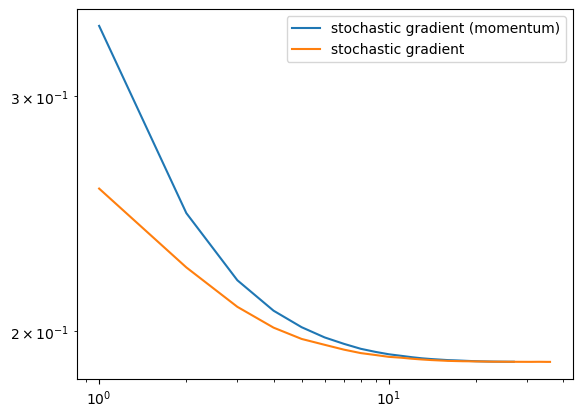

In [30]:
np.random.seed(312)
# make the data (10 features)
X, y = make_blobs(n_samples = 200, n_features = 2, centers = [(-1, -1), (1, 1)])

# stochasitc gradient (with momentum)
LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  m_epochs = 100, 
                  momentum = True, 
                  batch_size = 4, 
                  alpha = .07) 

num_steps = len(LR.loss_history)
print(num_steps)
# print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# stochasitc gradient (no momentum)
LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  m_epochs = 100, 
                  momentum = False, 
                  batch_size = 4, 
                  alpha = .07)

num_steps = len(LR.loss_history)
print(num_steps)
# print(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# plot loglog
plt.loglog()

legend = plt.legend()